# Deploy a TensorFlow model with Tensorflow Serving

### Problem Statement
#### Deploy a neural network model to classify [images of clothing, like sneakers and shirts](https://github.com/zalandoresearch/fashion-mnist)

### The Fashion MNIST dataset overview

The [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset  contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen below:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Although these are really images, they are loaded as NumPy arrays and not binary image objects.

### Import the libraries

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
!python3 -m pip install -Uq grpcio==1.26.0

In [0]:
from tensorflow import keras
import tensorflow as tf

/home/judy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/judy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/judy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/judy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

### Load the dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# scale the values to 0.0 to 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


### Define the model



In [0]:
model = keras.Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation=tf.nn.softmax, name='Softmax')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 8)         80        
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [0]:
epochs = 5

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 318us/sample - loss: 0.5403 - accuracy: 0.8096
Epoch 2/5
60000/60000 [==============================] - 21s 343us/sample - loss: 0.3888 - accuracy: 0.8638
Epoch 3/5
60000/60000 [==============================] - 18s 307us/sample - loss: 0.3540 - accuracy: 0.8745
Epoch 4/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.3349 - accuracy: 0.8798
Epoch 5/5
60000/60000 [==============================] - 18s 295us/sample - loss: 0.3227 - accuracy: 0.8838


### Evaluate the model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy: {}'.format(test_acc))

10000/10000 [==============================] - 2s 167us/sample - loss: 0.3549 - accuracy: 0.8772

Test accuracy: 0.8772000074386597


### Save the model

To load a trained model into TensorFlow Serving, it has to be saved in a [specifc](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/saved_model) format. This will create a protobuf file in a well-defined directory hierarchy and include a version number. The [TensorFlow Serving](https://www.tensorflow.org/tfx/guide/serving) allows you to select the version of a model, or **servable** you want to use when you make inference requests. Each version will be exported to a different subdirectory under the given path.

In [0]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key

MODEL_DIR = os.getcwd()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /home/judy/Downloads/1



In [0]:
tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None
)

INFO:tensorflow:Assets written to: /home/judy/Downloads/1/assets


In [0]:
print('\nSaved model:')
!ls -l {export_path}


Saved model:
total 64
drwxr-xr-x 2 judy judy  4096 Mar  5 17:17 assets
-rw-r--r-- 1 judy judy 55124 Mar  5 17:17 saved_model.pb
drwxr-xr-x 2 judy judy  4096 Mar  5 17:17 variables


## Examine the saved model

Use the command line utility `saved_model_cli` to look at the [MetaGraphDefs](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/MetaGraphDef) (the models) and [SignatureDefs](../signature_defs) (the methods you can call) in the SavedModel.  

In [0]:
!saved_model_cli show --dir {export_path} --all

/home/judy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/judy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/judy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/judy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

### Serve the model with TensorFlow Serving

### Add TensorFlow Serving distribution URI as a package source:

Prepare to install TensorFlow Serving using [Aptitude](https://wiki.debian.org/Aptitude), since this lab runs in a Debian environment. Add the `tensorflow-model-server` package to the list of packages that Aptitude knows about.  Run as root from the cmd.

Note: This example is running TensorFlow Serving natively, but [you can also run it in a Docker container](https://www.tensorflow.org/tfx/serving/docker), which is one of the easiest ways to get started using TensorFlow Serving.

In [0]:
# !sudo echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -
# !sudo apt update

### Install TensorFlow Serving

In [0]:
# !sudo apt-get install tensorflow-model-server

### Start running TensorFlow Serving

* `rest_api_port`: The port that you'll use for REST requests.
* `model_name`: You'll use this in the URL of REST requests.  It can be anything.
* `model_base_path`: This is the path to the directory where you've saved your model.


In [0]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [0]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


In [0]:
!tail server.log

2020-03-05 17:18:57.736505: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:203] Restoring SavedModel bundle.
2020-03-05 17:18:57.796778: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:152] Running initialization op on SavedModel bundle at path: /home/judy/Downloads/1
2020-03-05 17:18:57.809941: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:333] SavedModel load for tags { serve }; Status: success: OK. Took 141740 microseconds.
2020-03-05 17:18:57.810847: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /home/judy/Downloads/1/assets.extra/tf_serving_warmup_requests
2020-03-05 17:18:57.811462: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2020-03-05 17:18:57.816608: I tensorflow_serving/model_servers/server.cc:358] Running gRPC ModelServer at 0.0.0.0:8500 ...
[evhttp_server.cc : 223] NET_LOG: Couldn't bind to port 8501
[evht

### Make a request to the model


In [0]:
#Examin the input from the test data

def show(idx, title):
    """plot image"""
    plt.figure()
    plt.imshow(test_images[idx].reshape(28,28))
    plt.axis('off')
    plt.title('\n\n{}'.format(title), fontdict={'size': 16})

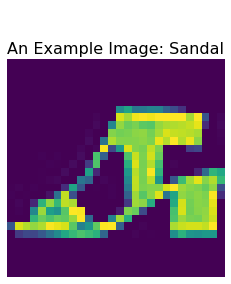

In [0]:
import random
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))

#Create the JSON object for a batch of  three inference requests

In [0]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


### Make REST requests

Send a predict request as a POST to the server's REST endpoint and pass it three examples.

In [0]:
import requests

In [0]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

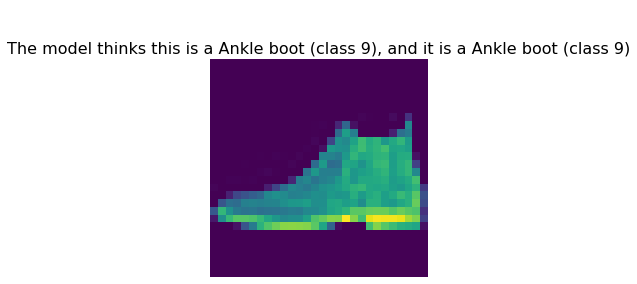

In [0]:
show(0, 'The model thinks this is a {} (class {}), and it is a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], test_labels[0], class_names[np.argmax(predictions[0])], test_labels[0]))

### Specify a particular version of the servable 

In [0]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

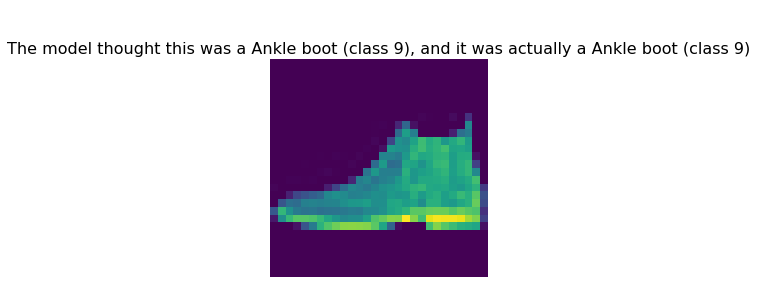

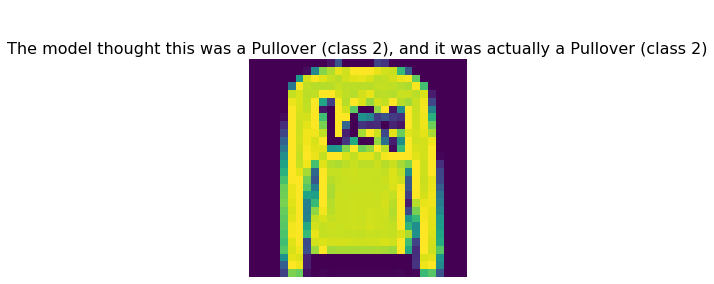

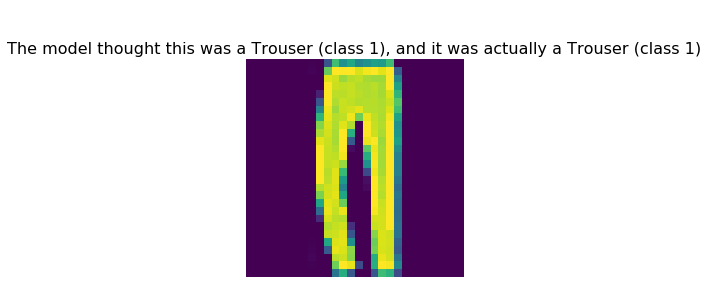

In [0]:
for i in range(0,3):
    show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], test_labels[i], class_names[np.argmax(predictions[i])], test_labels[i]))